In [13]:
import pandas as pd
df = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv")
df = df.drop(columns=['Timestamp'])
df = df.fillna(df.mean(numeric_only=True))
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])



In [14]:
X = df.drop(columns=['WORK_LIFE_BALANCE_SCORE'])
y = df['WORK_LIFE_BALANCE_SCORE']
X = pd.get_dummies(X, drop_first=True)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Ensemble: ortalama tahmin
ensemble_pred = (rf_pred + xgb_pred) / 2

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("XGBoost MSE:", mean_squared_error(y_test, xgb_pred))
print("Ensemble MSE:", mean_squared_error(y_test, ensemble_pred))


Random Forest MSE: 131.39966301189358
XGBoost MSE: 63.450768700114594
Ensemble MSE: 62.227218723098126


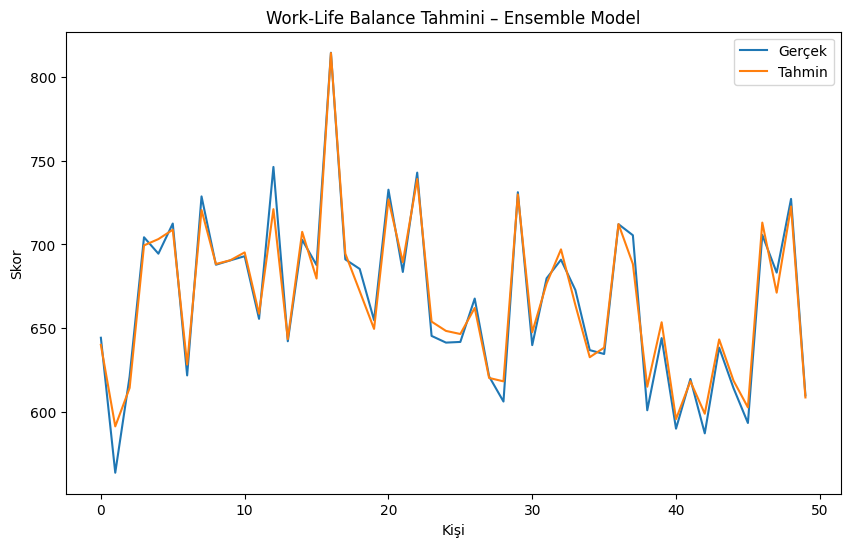

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values[:50], label='Gerçek')
plt.plot(ensemble_pred[:50], label='Tahmin')
plt.legend()
plt.title("Work-Life Balance Tahmini – Ensemble Model")
plt.xlabel("Kişi")
plt.ylabel("Skor")
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}


for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    print(f"{name} Ortalama MSE: {mse:.2f}")



Linear Regression Ortalama MSE: 0.00
Random Forest Ortalama MSE: 140.50
XGBoost Ortalama MSE: 62.08
